In [1]:
# Hidden Markov Model with self loops
# Author: Drishtii@
# Based on
# https://github.com/probml/pmtk3/blob/master/demos/hmmSelfLoopDist.m

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import nbinom
import math

In [2]:
# import os
# os.environ["LATEXIFY"] = ""
# os.environ["FIG_DIR"] = "figures"
pml.latexify(width_scale_factor=2)

/home/patel_karm/sendbox/probml-utils/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/patel_karm/sendbox/probml-utils/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


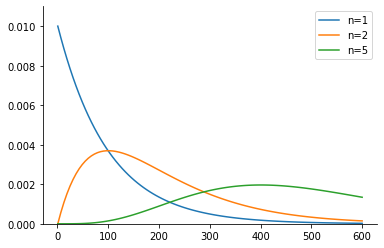

In [3]:
Ls = np.linspace(1, 600, 100).astype(int)  # path lengths
ns = np.array([1, 2, 5])  # nos. of nodes
p = 0.99  # self-loop probability


def binomial(n, k):
    return math.log(math.factorial(n) // math.factorial(k) // math.factorial(n - k))


def plot_nbinom_dist(ns, Ls, p):
    logp = np.log(p)
    logq = np.log(1 - p)
    h = np.zeros((len(ns), 1))
    for i in range(len(ns)):
        n = ns[i]
        ps = np.zeros((len(Ls), 1))
        for j in range(len(Ls)):
            L = Ls[j]
            if L >= n:
                ps[j] = np.exp(binomial(L - 1, n - 1) + (L - n) * logp + n * logq)
        plt.ylim(0, 0.011)
        plt.plot(Ls, ps)


# Negative Binomial Distribution:
plot_nbinom_dist(ns, Ls, p)
plt.legend(["$n=1$", "$n=2$", "$n=5$"])
sns.despine()
pml.savefig("hmm_self_loop.pdf")
plt.show()